## Outlier And Its Impacts On Machine Learning 

 Which machine learining models are sensitive to outliers?
1. Naivye Bayes Classifier ---Not sensitive to outliers
2. SVM------------------Not sensitive to outliers
3. Liner Regression------- sensitive to outliers
4. Logistic Regression-----sensitive to outliers
5. Dicision Tree Regressor or Classifier-------Not sensitive to outliers
6. Ensemble(RF-Random forest,XGboost,GB-Graident boosting)-------Not sensitive to outliers
7. KNN----------Not sensitive to outliers
8. Kmeans---------sensitive to outliers
9. Hierarical---------sensitive to outliers
10. PCA---------sensitive to outliers
11. Neuaral Networks---------sensitive to outliers


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [4]:
df['age'].isnull().sum()

177

C:\Users\sanug\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


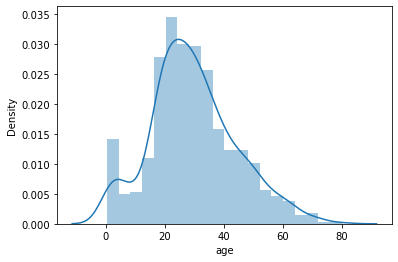

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['age'])
plt.show()

C:\Users\sanug\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


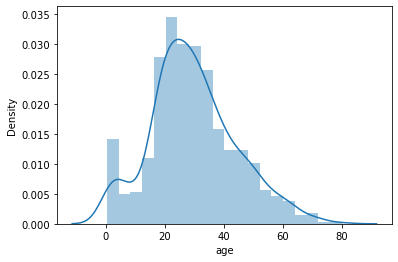

In [6]:
sns.distplot(df['age'].dropna())
plt.show()

C:\Users\sanug\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


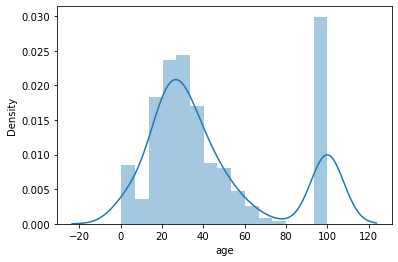

In [7]:
sns.distplot(df['age'].fillna(100))
plt.show()

## Gaussian Distribution

Text(0, 0.5, 'no of passengers')

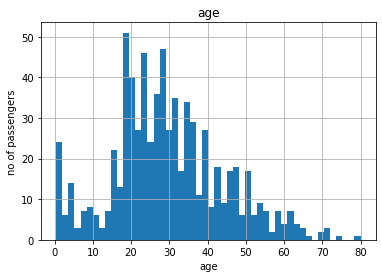

In [8]:
figure = df.age.hist(bins=50)
figure.set_title('age')
figure.set_xlabel('age')
figure.set_ylabel('no of passengers')

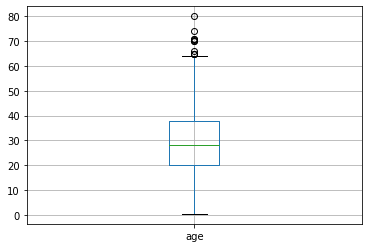

In [9]:
fig = df.boxplot(column='age')

In [10]:
df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

### if the data is Normally Distributed we use this Technique

In [11]:
### Assuming age follows a Gaussian Distribution we will calculate the boundaries which differentiates the outliers
# do upto this step
upper_boundry = df['age'].mean() + 3*df['age'].std()
lower_boundry = df['age'].mean() - 3*df['age'].std()

In [12]:
upper_boundry,lower_boundry,print(df['age'].mean())

29.69911764705882


(73.27860964406095, -13.88037434994331, None)

In [13]:
## lets compute the interquantile range to calculate the boundaries

IQR = df.age.quantile(0.75) - df.age.quantile(0.25)

In [14]:
IQR

17.875

In [15]:
lower_bridge = df['age'].quantile(0.25) - (IQR*1.5)

In [16]:
lower_bridge

-6.6875

In [17]:
upper_bridge = df['age'].quantile(0.75) + (IQR*1.5)

In [18]:
upper_bridge

64.8125

In [19]:
# extreme outliers multiply with 3
lower_bridge = df['age'].quantile(0.25) - (IQR*3)
upper_bridge = df['age'].quantile(0.75) + (IQR*3)

In [20]:
print(lower_bridge),print(upper_bridge)


-33.5
91.625


(None, None)

### if Feature is skewed we use the below Technique

Text(0, 0.5, 'no of passengers')

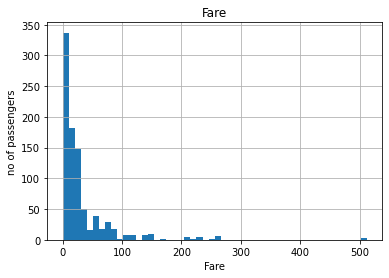

In [21]:
figure = df.fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('no of passengers')

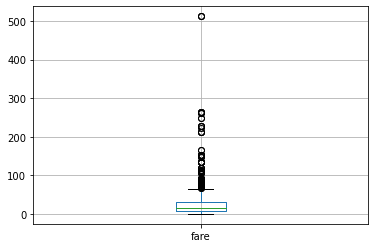

In [22]:
fig = df.boxplot(column='fare')

In [23]:
df['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [24]:
## lets compute the interquantile range to calculate the boundaries

IQR = df.fare.quantile(0.75) - df.fare.quantile(0.25)

In [25]:
IQR

23.0896

In [26]:
lower_bridge = df['fare'].quantile(0.25) - (IQR*1.5)
upper_bridge = df['fare'].quantile(0.75) + (IQR*1.5)
print(lower_bridge),print(upper_bridge)

-26.724
65.6344


(None, None)

In [27]:
# extreme outlires

lower_bridge = df['fare'].quantile(0.25) - (IQR*3)
upper_bridge = df['fare'].quantile(0.75) + (IQR*3)

In [28]:
print(lower_bridge),print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [29]:
data = df.copy()

In [30]:
data.loc[data['age']>73,'age']=73

<AxesSubplot:>

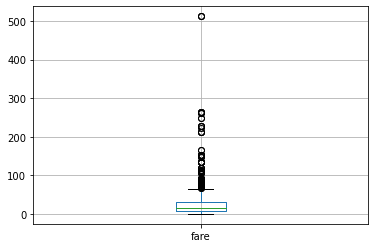

In [31]:
df.boxplot(column='fare')

In [32]:
data.head(100)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
95,0,3,male,NaN,0,0,8.0500,S,NaN
96,0,1,male,71.0,0,0,34.6542,C,A
97,1,1,male,23.0,0,1,63.3583,C,D
98,1,2,female,34.0,0,1,23.0000,S,NaN


In [33]:
data.loc[data['fare']>=100,'fare']=100

In [34]:
data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


Text(0, 0.5, 'no of passengers')

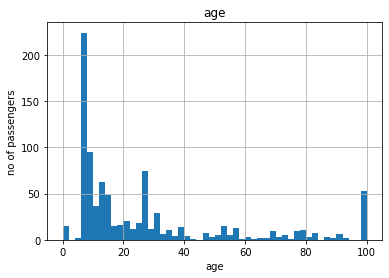

In [35]:
figure = data.fare.hist(bins=50)
figure.set_title('age')
figure.set_xlabel('age')
figure.set_ylabel('no of passengers')

Text(0, 0.5, 'no of passengers')

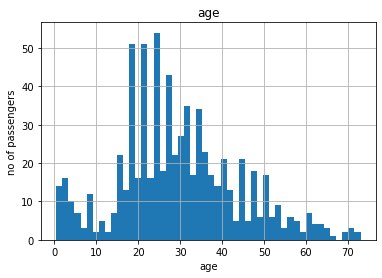

In [36]:
figure = data.age.hist(bins=50)
figure.set_title('age')
figure.set_xlabel('age')
figure.set_ylabel('no of passengers')

Text(0, 0.5, 'no of passengers')

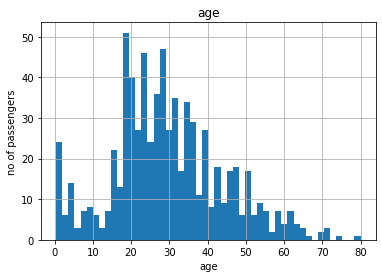

In [37]:
figure = df.age.hist(bins=50)
figure.set_title('age')
figure.set_xlabel('age')
figure.set_ylabel('no of passengers')

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data[['age','fare']].fillna(0),data['survived'],test_size=0.3)

In [39]:
from sklearn.linear_model import LogisticRegression
classifer = LogisticRegression()
classifer.fit(x_train,y_train)
y_pred = classifer.predict(x_test)
y_pred1 = classifer.predict_proba(x_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuaracy-score:{}".format(accuracy_score(y_test,y_pred)))
print("Roc_auc_score:{}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuaracy-score:0.664179104477612
Roc_auc_score:0.7377463959988232


In [40]:
from sklearn.ensemble import RandomForestClassifier
classifer = RandomForestClassifier()
classifer.fit(x_train,y_train)
y_pred = classifer.predict(x_test)
y_pred1 = classifer.predict_proba(x_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuaracy-score:{}".format(accuracy_score(y_test,y_pred)))
print("Roc_auc_score:{}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuaracy-score:0.6567164179104478
Roc_auc_score:0.7279493968814358


In [41]:
#0-255pixels